### Import Library and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/algonacci/DataWarehouse/main/activity_km_07_01.csv')
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


### Normalization

In [3]:
data.rename(columns={
    "intensitas air" : "intensitas_air",
    "tinggi air" : "tinggi_air"
}, inplace=True)
data.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


In [4]:
data.dtypes

PH                float64
cahaya             object
intensitas_air     object
suhu              float64
PPM               float64
tinggi_air          int64
aksi               object
dtype: object

In [5]:
data["cahaya"].value_counts()

Ada          302
Tidak ada    288
Name: cahaya, dtype: int64

In [6]:
data["intensitas_air"].value_counts()

Tinggi           154
Cukup            154
Rendah           154
Rendah sekali    154
Name: intensitas_air, dtype: int64

In [7]:
data['aksi'].value_counts()

Tidak melakukan apa-apa                 473
Hidupkan Lampu                           92
Hidupkan Lampu dan Pompa nutrisi TDS     39
Hidupkan Pompa nutrisi TDS               12
Name: aksi, dtype: int64

In [10]:
kategorikal = {"cahaya":
               {"Tidak ada": 0, "Ada": 1},
               "intensitas_air":
               {"Rendah Sekali": 0, "Rendah": 1, "Cukup": 2, "Tinggi": 3,},
               "aksi":
               {"Tidak melakukan apa-apa" : 0, "Hidupkan Lampu" : 1, "Hidupkan Lampu dan Pompa nutrisi TDS" : 2, "Hidupkan Pompa nutrisi TDS" : 3}
               ,}

In [11]:
data = data.replace(kategorikal)
data.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3,27.0,188.0,622,2
1,5.7,1.0,3,26.9,79.0,557,2
2,6.0,1.0,3,27.0,11.0,491,2
3,6.5,1.0,3,27.1,345.0,12000,0
4,6.2,NaN,3,27.1,602.0,444,0


### Handle Missing Value

In [12]:
data.isnull().sum()

PH                16
cahaya            26
intensitas_air     0
suhu              27
PPM                5
tinggi_air         0
aksi               0
dtype: int64

In [13]:
data.isnull().sum().sum()

74

#### Detect Outliers

C:\Users\Vulcan\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


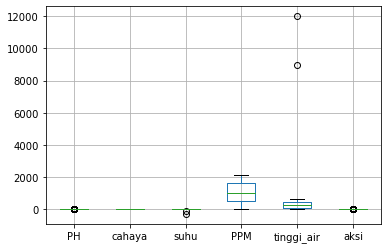

In [14]:
data.boxplot()
plt.show()

In [15]:
data['PH']=data['PH'].fillna(data['PH'].mean())
data.isnull().sum()

PH                 0
cahaya            26
intensitas_air     0
suhu              27
PPM                5
tinggi_air         0
aksi               0
dtype: int64

In [16]:
data['cahaya'].fillna(method='bfill', inplace=True)
data.isnull().sum()

PH                 0
cahaya             0
intensitas_air     0
suhu              27
PPM                5
tinggi_air         0
aksi               0
dtype: int64

In [17]:
data['cahaya'].head(187)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
182    0.0
183    0.0
184    0.0
185    0.0
186    0.0
Name: cahaya, Length: 187, dtype: float64

In [18]:
data['suhu'].describe()

count    589.000000
mean      29.364007
std       14.937524
min     -300.000000
25%       27.100000
50%       29.900000
75%       33.000000
max       40.600000
Name: suhu, dtype: float64

In [19]:
data.drop([109,118], axis=0, inplace=True)
data['suhu'].describe()

count    587.000000
mean      30.145486
std        3.098507
min       25.000000
25%       27.100000
50%       29.900000
75%       33.000000
max       40.600000
Name: suhu, dtype: float64

In [20]:
data['suhu']=data['suhu'].fillna(data['suhu'].mean())
data.isnull().sum()

PH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               5
tinggi_air        0
aksi              0
dtype: int64

In [21]:
data['PPM']=data['PPM'].fillna(data['PPM'].median())
data.isnull().sum()

PH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

In [22]:
data['tinggi_air'].describe()

count      614.000000
mean       287.442997
std        623.307663
min          0.000000
25%         50.000000
50%        228.500000
75%        429.000000
max      12000.000000
Name: tinggi_air, dtype: float64

In [23]:
data['tinggi_air'].iloc[[3,77]]

3     12000
77     9000
Name: tinggi_air, dtype: int64

In [24]:
data.drop([3,77], axis=0, inplace=True)
data['tinggi_air'].describe()

count    612.000000
mean     254.068627
std      199.769962
min        0.000000
25%       50.000000
50%      226.500000
75%      429.000000
max      629.000000
Name: tinggi_air, dtype: float64

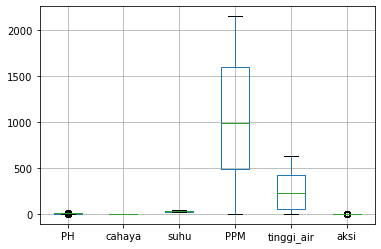

In [25]:
data.boxplot()
plt.show()